In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import fictrac_processing as fictrac

### Select File to Sync



In [2]:
fileToSync = r'Data\fictrac data with scope scan info\fictrac-daq-20220726_180925.dat' # This data was recorded without calibrating fictrac

### Import Data


In [3]:
ficData = fictrac.loadFictracDat(fileToSync, withScanInfo=True)

### Sync Data


In [4]:
def createPanel(x, y, width, height, figureWidth, figureHeight):
    """
    Creates a panel
    width, and height are normalized to the figure's width and height
    """
    return plt.axes([x, y ,width/figureWidth, height/figureHeight])


In [5]:
length = 1000

scanArray = fictrac.getPartialScanPeriods(ficData, length)

In [6]:
fullScans = fictrac.getFullScanPeriods(scanArray)

full scan from frame 12008.0 to frame 12149.0
full scan from frame 12176.0 to frame 12318.0
full scan from frame 12345.0 to frame 12486.0
full scan from frame 12513.0 to frame 12654.0
full scan from frame 12681.0 to frame 12822.0


In [7]:
print("Distance between full scans")
for i in range(len(fullScans)-1):
    dist = fullScans[i+1]['frameStart'] - fullScans[i]['frameEnd']
    if dist > 30:
        print(f"{dist} frames between scan ending at {fullScans[i]['frameEnd']} and scan starting at {fullScans[i+1]['frameStart']}")
    else:
        print(dist)
    
    

Distance between full scans
27.0
27.0
27.0
27.0


In [8]:
# print(scanArray)

# for item in scanArray:
#     if not(item['isScanning']):
#         print(item)

(11939.0, 12939.0)

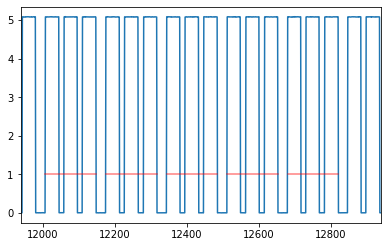

In [9]:
figureWidth = 6
figureHeight = 4
panelWidth = 5
panelHeight = 3

panel = createPanel(0.1, 0.1, panelWidth, panelHeight, figureWidth, figureHeight)

panel.plot(ficData['cnt'], ficData['scanvolts'])

# panel.plot(ficData['cnt'], ficData['r_cam_z'])


# Plot Full Scan regions
for item in fullScans:
    panel.plot([item['frameStart'], item['frameEnd']],
               [1,1],
               color=(1,0,0,0.5))

startFrame = ficData.iloc[0]['cnt']
panel.set_xlim(startFrame, startFrame + length)
# panel.set_xlim(12750, 13100)

In [10]:
# print(ficData.info())

In [11]:
# print(ficData.head())

(11939.0, 12939.0)

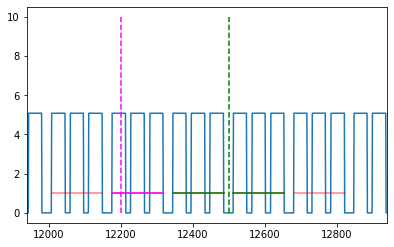

In [12]:
# Create function where given a timepoint (in frames) return the scan it is in


figureWidth = 6
figureHeight = 4
panelWidth = 5
panelHeight = 3

panel = createPanel(0.1, 0.1, panelWidth, panelHeight, figureWidth, figureHeight)

panel.plot(ficData['cnt'], ficData['scanvolts'])

# Plot Full Scan regions
for item in fullScans:
    panel.plot([item['frameStart'], item['frameEnd']],
               [1,1],
               color=(1,0,0,0.5))

# Test findScanPeriod()
testSpot1 = 12200
testSpot2 = 12500

for testSpot, color in [(testSpot1, "magenta"), (testSpot2, "green")]:
    testScan = fictrac.findScanPeriod(fullScans, testSpot)
    for scan in testScan:
        panel.plot([scan['frameStart'], scan['frameEnd']],
                   [1,1],
                   color=color)
        
    panel.plot([testSpot, testSpot],
           [0,10],
           color=color,
           linestyle='dashed')
        

startFrame = ficData.iloc[0]['cnt']
panel.set_xlim(startFrame, startFrame + length)